## Jin Howe

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [30]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [31]:
sat_data = {}

with open('sat_scores.csv') as f:
    
    ## Generates a list of list of each row
    reader = list(csv.reader(f))

    for i,col in enumerate(reader[0]):
        col_list = []
        for line in reader[1:]:
            col_list.append(line[i])
        sat_data[col] = col_list
        
    
f.close()

sat_data

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [32]:
## Creating DataFrame from SAT dictionary

df = pd.DataFrame(sat_data)
print df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object


In [33]:
## Creating DataFrame from read_csv

g = 'sat_scores.csv'
df = pd.read_csv(g)
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### <font color='Green'><u>Answer</u></font>

Difference will be that from dataframe from dictionary will return all column values as object/str, but read_csv assigns the most suitable type to the column values.

If you do not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [34]:
df.shape

(52, 4)

In [35]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [36]:
df['Rate'].max()

82

### <font color='Green'><u>Answer</u></font>

State indicates the US state the data is representing

Rate is probably the pass rate

Verbal is probably the average verbal score for that state

Math is probably the average math score for that state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [37]:
for i,j in enumerate(df.columns):
    print i,j

0 State
1 Rate
2 Verbal
3 Math


In [38]:
## Creating a list of the descriptions to be matched to 'description' key within the dictionary for corresponding variable key in the data dictionary
data_description = ['State indicates the State data is representing',
                   'Rate is probably the pass rate',
                   'Verbal is probably the average verbal score for that state',
                   'Math is probably the average math score for that state']
data_dict = {}

## For loop to create a descriptive dictionary within each variable key in the main data dictionary
for i,j in enumerate(df.columns):
    var_dict = {}            ## variable's descriptive dictionary
    
    var_dict['type'] = df[j].dtype    ## calling the column's from df and finding its dtype
    var_dict['description'] = data_description[i]     ## drawing the corresponding string from data_description list
    
    data_dict[j] = var_dict      ## matching variable's dictionary to variable key in data dictionary

data_dict['shape'] = df.shape    ## adding the df's shape key value pair
data_dict

{'Math': {'description': 'Math is probably the average math score for that state',
  'type': dtype('int64')},
 'Rate': {'description': 'Rate is probably the pass rate',
  'type': dtype('int64')},
 'State': {'description': 'State indicates the State data is representing',
  'type': dtype('O')},
 'Verbal': {'description': 'Verbal is probably the average verbal score for that state',
  'type': dtype('int64')},
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')    ## Using fivethirtyeight preset style

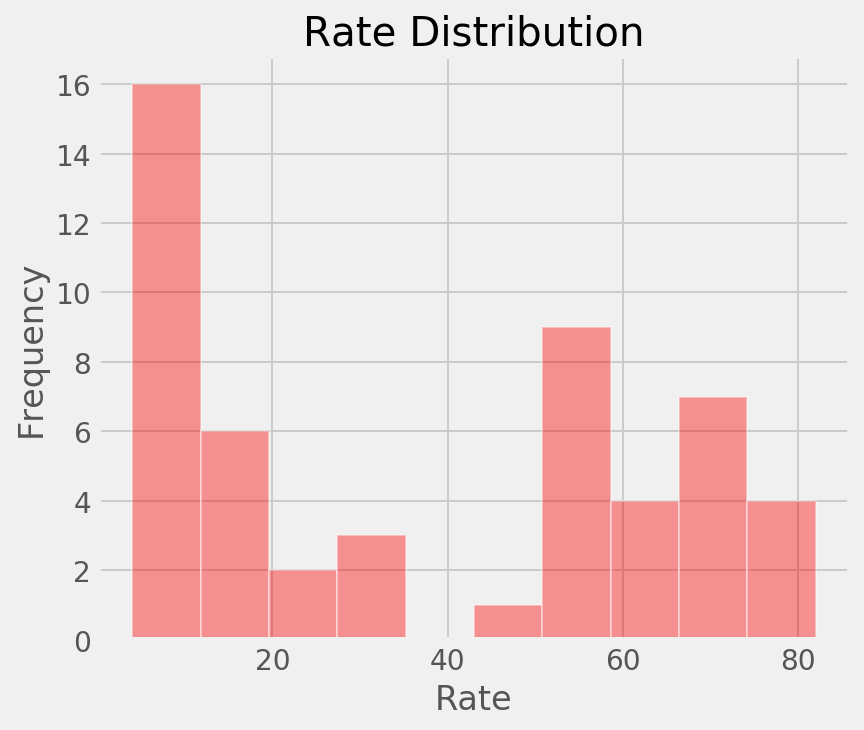

In [40]:
plt.figure(figsize=(6,5))          ## Setting the figure and size
sns.distplot(df['Rate'],kde=False,bins=10,hist_kws=dict(edgecolor='w',lw=1),color='red')    ## Creating the distplot, with 'Rate' data series

plt.title('Rate Distribution')     ## Creating the title
plt.ylabel('Frequency')          ## Give y-axis a label
plt.show()

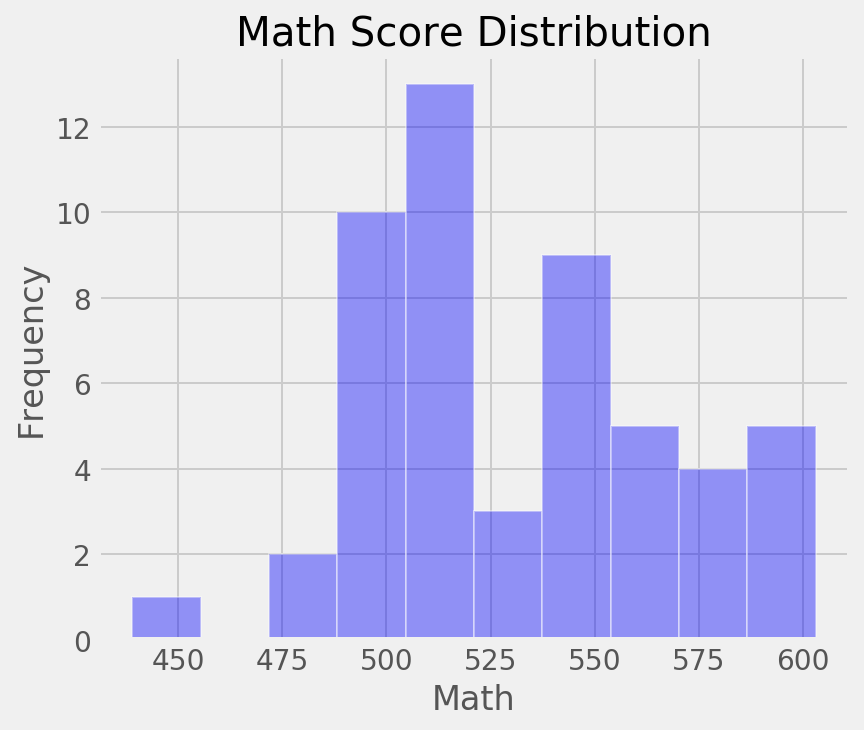

In [41]:
plt.figure(figsize=(6,5))        ## Setting the figure and size
sns.distplot(df['Math'],kde=False,bins=10,hist_kws=dict(edgecolor='w',lw=1),color='blue')             ## Creating the distplot, with 'Math' data series

plt.title('Math Score Distribution')      ## Creating the title
plt.ylabel('Frequency')                  ## Give y-axis a label
plt.show()

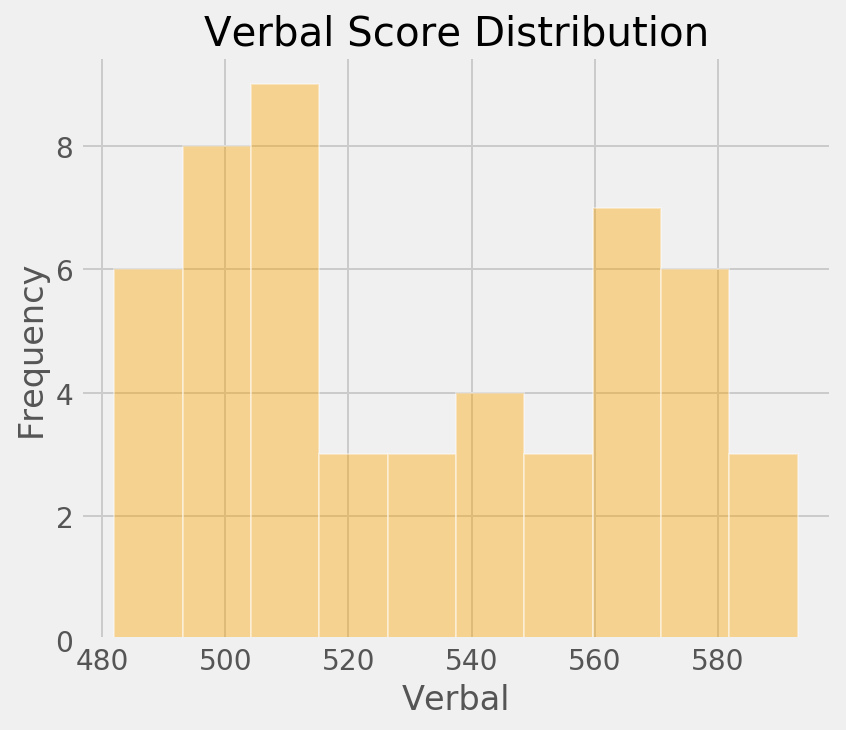

In [42]:
plt.figure(figsize=(6,5))           ## Setting the figure and size
sns.distplot(df['Verbal'],kde=False,bins=10,hist_kws=dict(edgecolor='w',lw=1),color='orange')    ## Creating the distplot, with 'Verbal' data series

plt.title('Verbal Score Distribution')      ## Creating the title
plt.ylabel('Frequency')                     ## Give y-axis a label
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

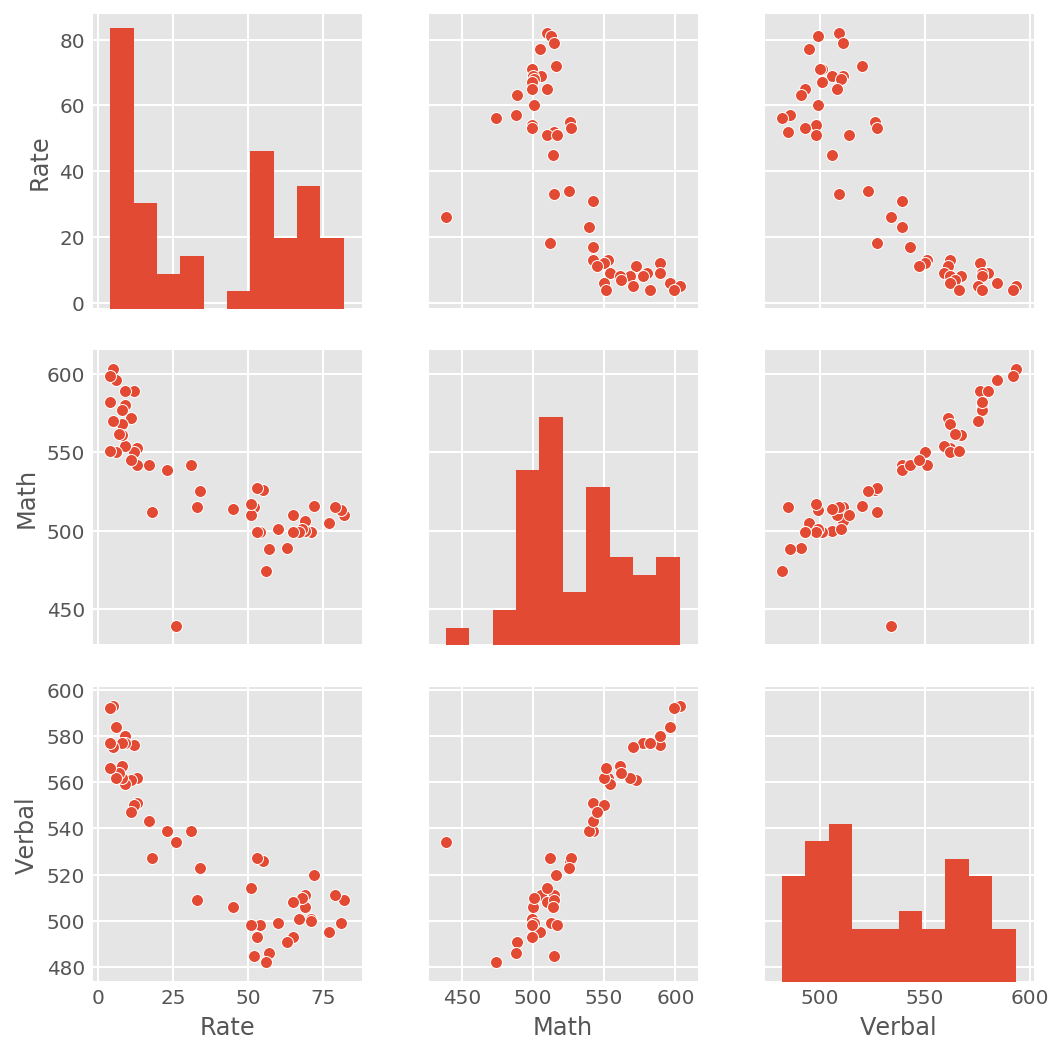

In [43]:
plt.style.use('ggplot')        ## Using the ggplot preset style
sns.pairplot(data=df[['Rate','Math','Verbal']])

### <font color='Green'><u>Answer</u></font>

Diagonally, it shows the univariate distribution of the data for the variable in that column.
Other plots in the grid show the relationship between the data variables, with scatter plots.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

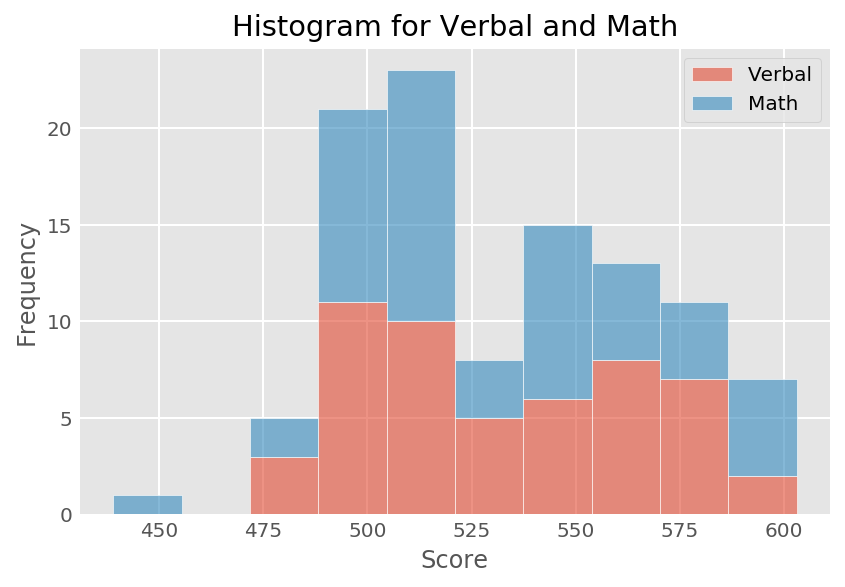

In [45]:
## Plotting the stacked histogram

df[['Verbal','Math']].plot.hist(stacked=True,edgecolor='white',alpha=0.6)
plt.xlabel('Score')            ## Labeling the x-axis
plt.title('Histogram for Verbal and Math')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5,1,u'Boxplot for Math and Verbal')

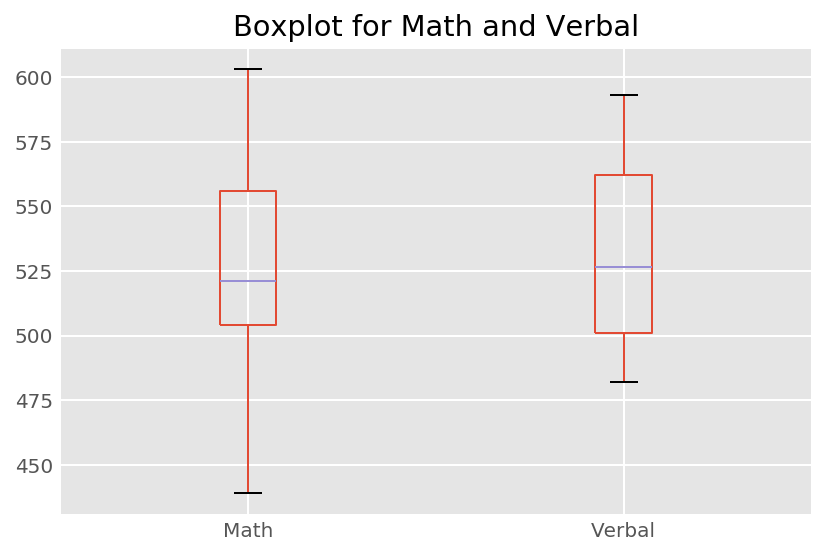

In [46]:
df[['Math','Verbal']].plot.box().set_title('Boxplot for Math and Verbal')   ## Creating a boxplot with 'Math' and 'Verbal' scores
## .set_title to create title for the plot

### <font color='Green'><u>Answer</u></font>

A boxplot is able to better visualize the summary of the distribution (i.e spread,range,IQR,1st/3rd Quartile, Median, Outliers) than a scatterplot or a histogram. 

Raw 'Rate' is not appropriate to be plotted in this same chart as its values are on much smaller magnitude than the 'Math' and 'Verbal' values. Hence, the scale of the boxplot figure will be very skewed to accommodate 'Rate', affecting effective visualization.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [47]:
## Scaling values to same scale based on z-values

df_z = (df[['Verbal','Math','Rate']]-df[['Verbal','Math','Rate']].mean())/df[['Verbal','Math','Rate']].std()

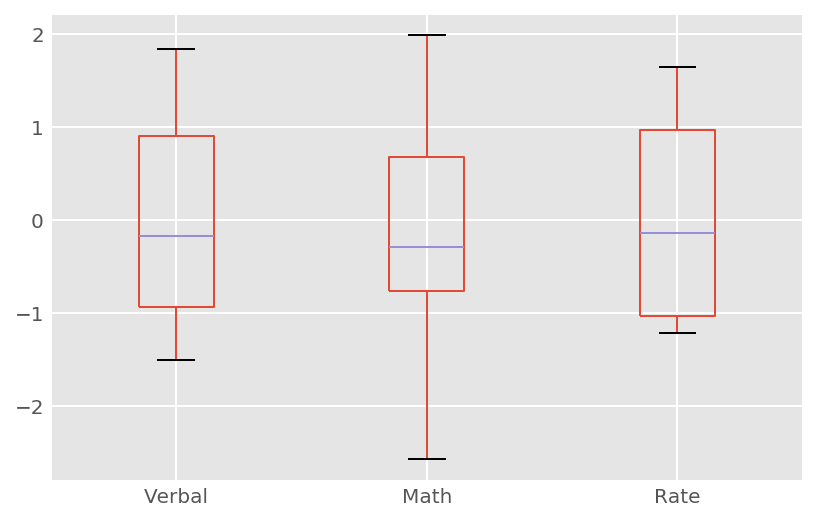

In [48]:
df_z.plot.box()
plt.show()

### <font color='Green'><u>Answer</u></font>

To plot the 3 variables, I decided to normalize them to the same scale based on the values' z-scores. This will allow more accurate comparison of their spread, side by side. Like comparing apples to apples.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [49]:
## Creating a list of states that have 'Verbal' score above mean.

list(df[df['Verbal']>(df['Verbal'].mean())]['State'])

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [50]:
## Finding the number of states above 'Verbal' mean

len(list(df[df['Verbal']>(df['Verbal'].mean())]['State']))

24

### <font color='Green'><u>Answer</u></font>

There are 24 out of 52 states with 'Verbal' scores greater than average, which is less than half of the total.
From this, it can be inferred that the 'Verbal' mean > 'Verbal' median, and thus the 'Verbal' score distribution is right skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [51]:
## Creating a list of states that have 'Verbal' score above median.

states_verbal = sorted(list(df[df['Verbal']>(df['Verbal'].median())]['State']))

## Running a loop to findout which are the extra states that are both above median and mean
for x in sorted((list(df[df['Verbal']>(df['Verbal'].mean())]['State']))):
    if x in states_verbal:
        states_verbal.remove(x)

In [52]:
## The states that are both above median and mean

state_verbal

NameError: name 'state_verbal' is not defined

In [ ]:
print ("Number of states above 'Verbal' median: {} ".format(len(list(df[df['Verbal']>(df['Verbal'].median())]['State']))))
print ("Number of states above 'Verbal' mean: {} ".format(len(list(df[df['Verbal']>(df['Verbal'].mean())]['State']))))

### <font color='Green'><u>Answer</u></font>
There are 2 more states with ('Verbal' > 'Verbal' median) than ('Verbal'>'Verbal' mean).
Both share the same states, except the extra 'WA' and 'WV' in ('Verbal' > 'Verbal' medians).

This is because the 'Verbal' mean >'Verbal' median. While we can expect all states on the right of the mean in the score distribution, to also be right of the median, we cannot expect same vice versa (i.e not all states to the right of median are on the right of the mean too).

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
## Creating a new column for the difference between 'Verbal' and 'Math' scores

df['Diff_VM'] = df['Verbal']-df['Math']    ## Pandas series substraction

In [ ]:
df['Diff_VM']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [ ]:
## DataFrame with 10 states with greatest gap, where Verbal>Math

df_diff_v_greater = df.sort_values('Diff_VM',ascending=False).head(10).reset_index().drop('index',axis=1)

In [ ]:
## DataFrame with 10 states with greatest gap, where Verbal<Math

df_diff_m_greater = df.sort_values('Diff_VM',ascending=True).head(10).reset_index().drop('index',axis=1)

In [53]:
df_diff_v_greater.head(3)

NameError: name 'df_diff_v_greater' is not defined

In [ ]:
df_diff_m_greater.head(3)

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [ ]:
## Drawing out the 'Rate','Verbal','Math' as a separate DataFrame, to avoid 'State' being included when applying the correlation function


df[['Rate','Verbal','Math']].corr()

In [ ]:
sns.heatmap(df[['Rate','Verbal','Math']].corr(),cmap='coolwarm')  ## Creating the corresponding heatmap of corr coeff

### <font color='Green'><u>Answer</u></font>

The correlation matrix shows the correlation coefficient for:<br>
Rate/Verbal is approximately -0.886, which means the 2 variables have a strong negative linear relationship <br>
Math/Verbal is approximately 0.900, which means the 2 variables have a strong positive linear relationship<br>
Rate/Math is approximately -0.774, which means the 2 variables have a significant negative linear relationship <br>

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
df.describe()

### <font color='Green'><u>Answer</u></font>

<b>count</b> is the number of non-NA values in column variable<br>

<b>mean</b> is the average value of the values in column variable<br>

<b>std</b> is the standard deviation of the values in column variable<br>

<b>min</b> is the lowest numeric value of the values in column variable<br>

<b>25%</b> is the 25th percentile of the values in column variable<br>

<b>50%</b> is the median of the values in column variable<br>

<b>75%</b> is the 7th percentile of the values in column variable<br>

<b>max</b> is the highest numeric value of the values in the column variable<br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [54]:
## Drawing out the 'Rate','Verbal','Math' as a separate DataFrame, to avoid 'State' being included when applying the covariance function

df[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


### <font color='Green'><u>Answer</u></font>

1. The covariance matrix shows values that are very huge in magnitude, unlike the correlation matrix which has values between -1 and 1. <br>Furthermore, the top left to bottom right diagonal values are all 1 in the correlation matrix, while the covariance matrix neither follows the
<br> the same scale nor have a consistent diagonal value.
<br><br>
2. To convert into  the correlation, divide the covariance with the square root of the product of the variances of each variable .<br>
ie. Corr(x,y) = Cov(x,y)/sqrt(Var(x) * Var(y))
<br><br>
3. Unlike the covariance matrix, the correlation matrix shows values that are scaled to a standardized scale,and can be used to<br> more accurately and conveniently determine the degree and type of linear relationships between the variables.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [55]:
## Loading the Data

df_2 = pd.read_csv('drug-use-by-age.csv')

In [56]:
## Understanding the shape of the data

df_2.shape

(17, 28)

In [57]:
## Understanding what variables are involved

df_2.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [58]:
## Understanding the value type of each variable

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [59]:
## Understand the relationship between variables and their values

df_2.tail(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


### <font color='Green'><u>Answer</u></font>

There are missing values in some of the columns, which are causing their column dtype to be classified as object strings rather than float. Hence cleaning is required.

I will convert those column values to floats or NaN if necessary, then consolidate. If too many NaN values are in the column or row, I may have to remove them entirely.

In [60]:
## Cleaning the values to float or NaN

df_2[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']] = df_2[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']].apply(pd.to_numeric,errors = 'coerce')

In [61]:
## Checking the result of the 'cleaning'

df_2[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']]

,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,5.0,NaN,35.5,19.0,24.5,NaN
1,1.0,3.0,NaN,12.0,41.0,5.0
2,5.5,NaN,2.0,5.0,4.5,24.0
3,4.0,9.5,1.0,5.5,3.0,10.5
4,7.0,1.0,66.5,3.0,4.0,36.0
5,5.0,21.0,64.0,4.0,6.0,48.0
6,5.0,10.0,46.0,4.0,7.0,12.0
7,5.5,2.0,180.0,3.0,7.5,105.0
8,8.0,5.0,45.0,4.0,12.0,12.0
9,5.0,17.0,30.0,2.0,13.5,2.0


From the above, all affected columns have neglible number of NaN values. Same for the rows, except for age group 65+, which has 5 NaN values in it. That means approximately 20% of the relevant column values for the row of age 65+ are NaN. To avoid affecting the data further, I have decided to drop that row.

In [62]:
## Dropping the row with index 16, i.e age 65+

df_2.drop(16,inplace=True)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

##  <font color='Green'>Running analysis on 'Drug-use'</font>

In [63]:
df_2.loc[:,'alcohol-use'::2].describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,55.812500,20.031250,2.312500,0.312500,0.375000,3.600000,1.475000,6.625000,0.993750,2.96875,2.037500,0.406250,0.300000
std,27.712401,11.415821,1.784704,0.230579,0.331662,2.747605,0.883553,2.901149,0.576737,1.67281,1.361311,0.251578,0.121106
min,3.900000,1.100000,0.100000,0.000000,0.000000,0.200000,0.200000,2.000000,0.100000,0.20000,0.200000,0.000000,0.100000
25%,37.375000,9.975000,0.800000,0.075000,0.100000,1.350000,0.750000,4.125000,0.400000,1.77500,0.750000,0.200000,0.200000
50%,65.900000,21.650000,2.050000,0.400000,0.300000,3.300000,1.450000,7.250000,1.150000,3.55000,2.050000,0.400000,0.300000
75%,78.300000,29.550000,4.025000,0.500000,0.600000,5.475000,2.125000,9.050000,1.425000,4.22500,3.075000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.40000,4.100000,0.900000,0.500000


Comments:<br>
So far we can observe that Alcohol has the highest mean and standard deviation, followed by Marijuana. That means alcohol is the most widely used substance.

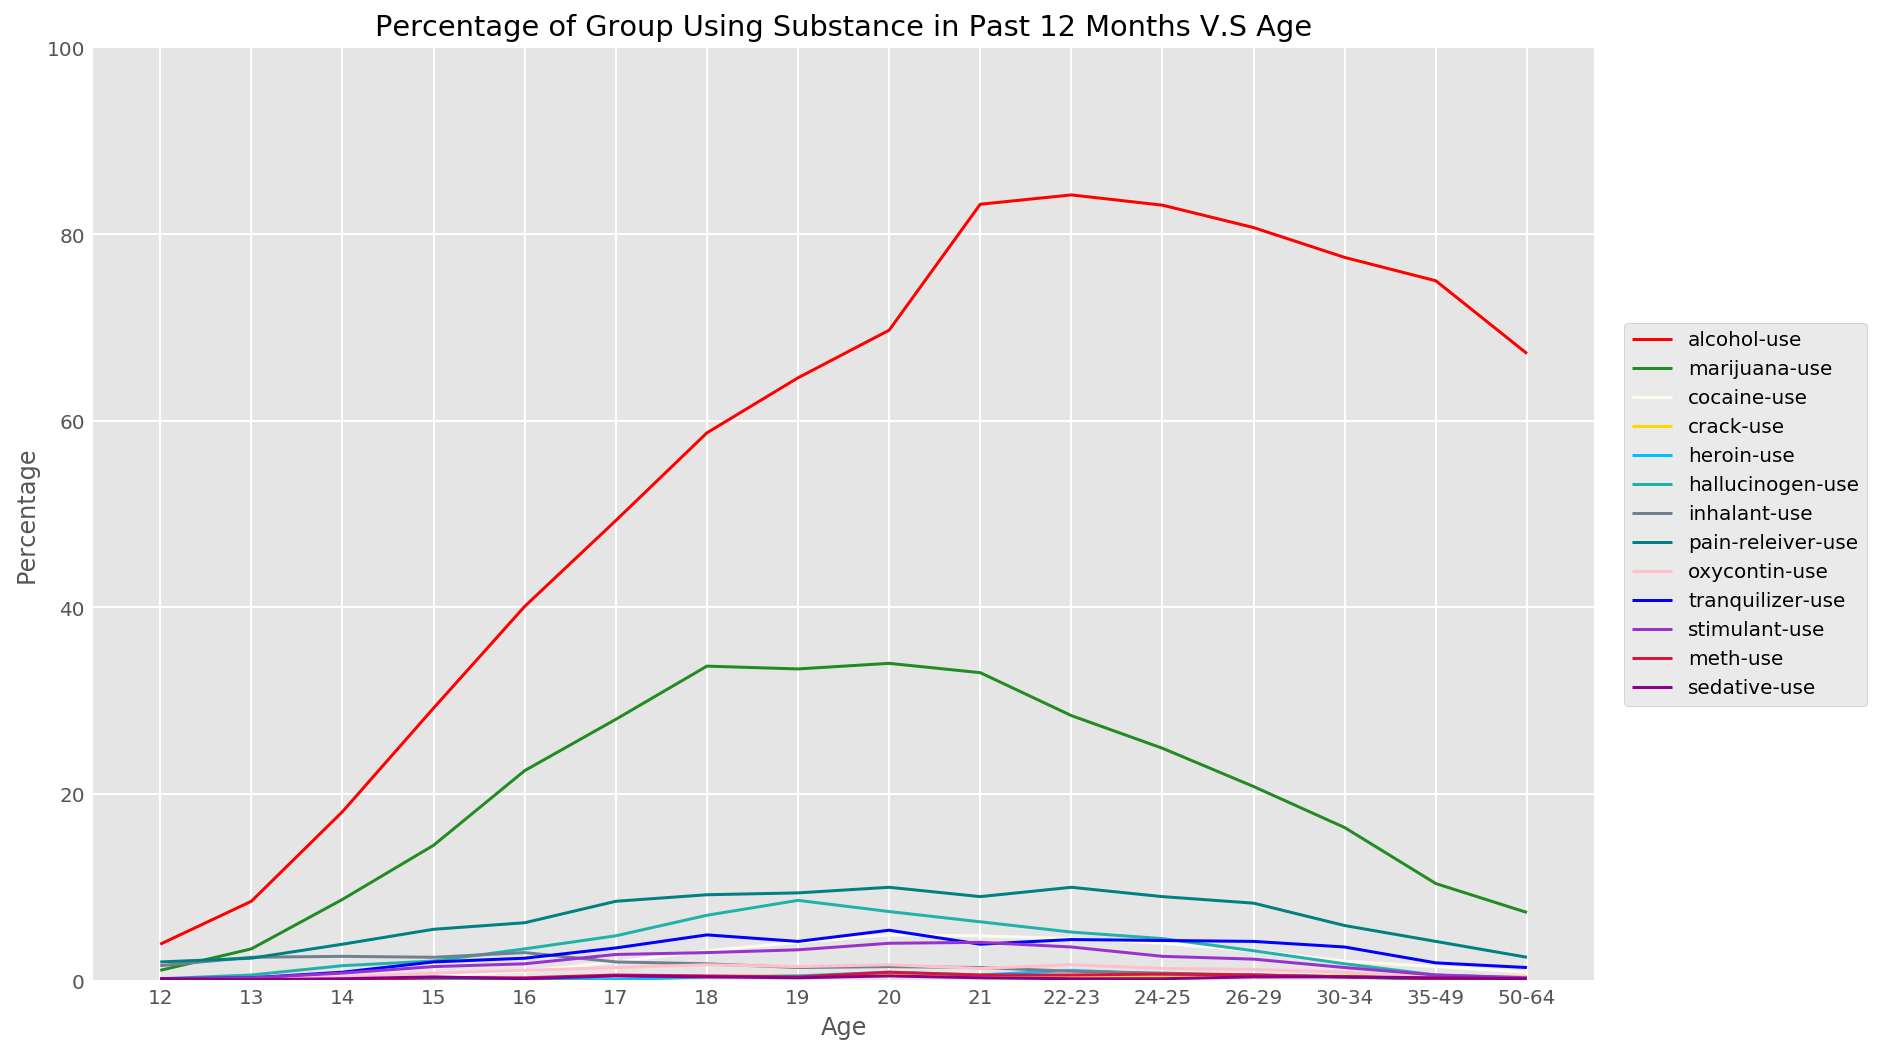

In [64]:
## Creating a line plot to see how proportion of drug users, for each drug changes across the age groups

c =['red','forestgreen','floralwhite','gold','deepskyblue','lightseagreen','slategray','teal','pink','blue','darkorchid','crimson','darkmagenta']

df_2.loc[:,'alcohol-use':'sedative-use':2].plot.line(figsize=(12,8),title = 'Percentage of Group Using Substance in Past 12 Months V.S Age',color = c,lw=1.5)


# Formatting the plot
plt.legend(loc='center',bbox_to_anchor=[1.1, 0.5])
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.xticks(np.arange(16),np.array(df_2['age']))

plt.show()

Comments:<br>
As we can see, alcohol is by the most popular drug followed by marijuana.<br>
Alcohol is hugely popular for above 21s, probably because of alcohol legislation.
While marijuana is more popular for 18-21 year olds.

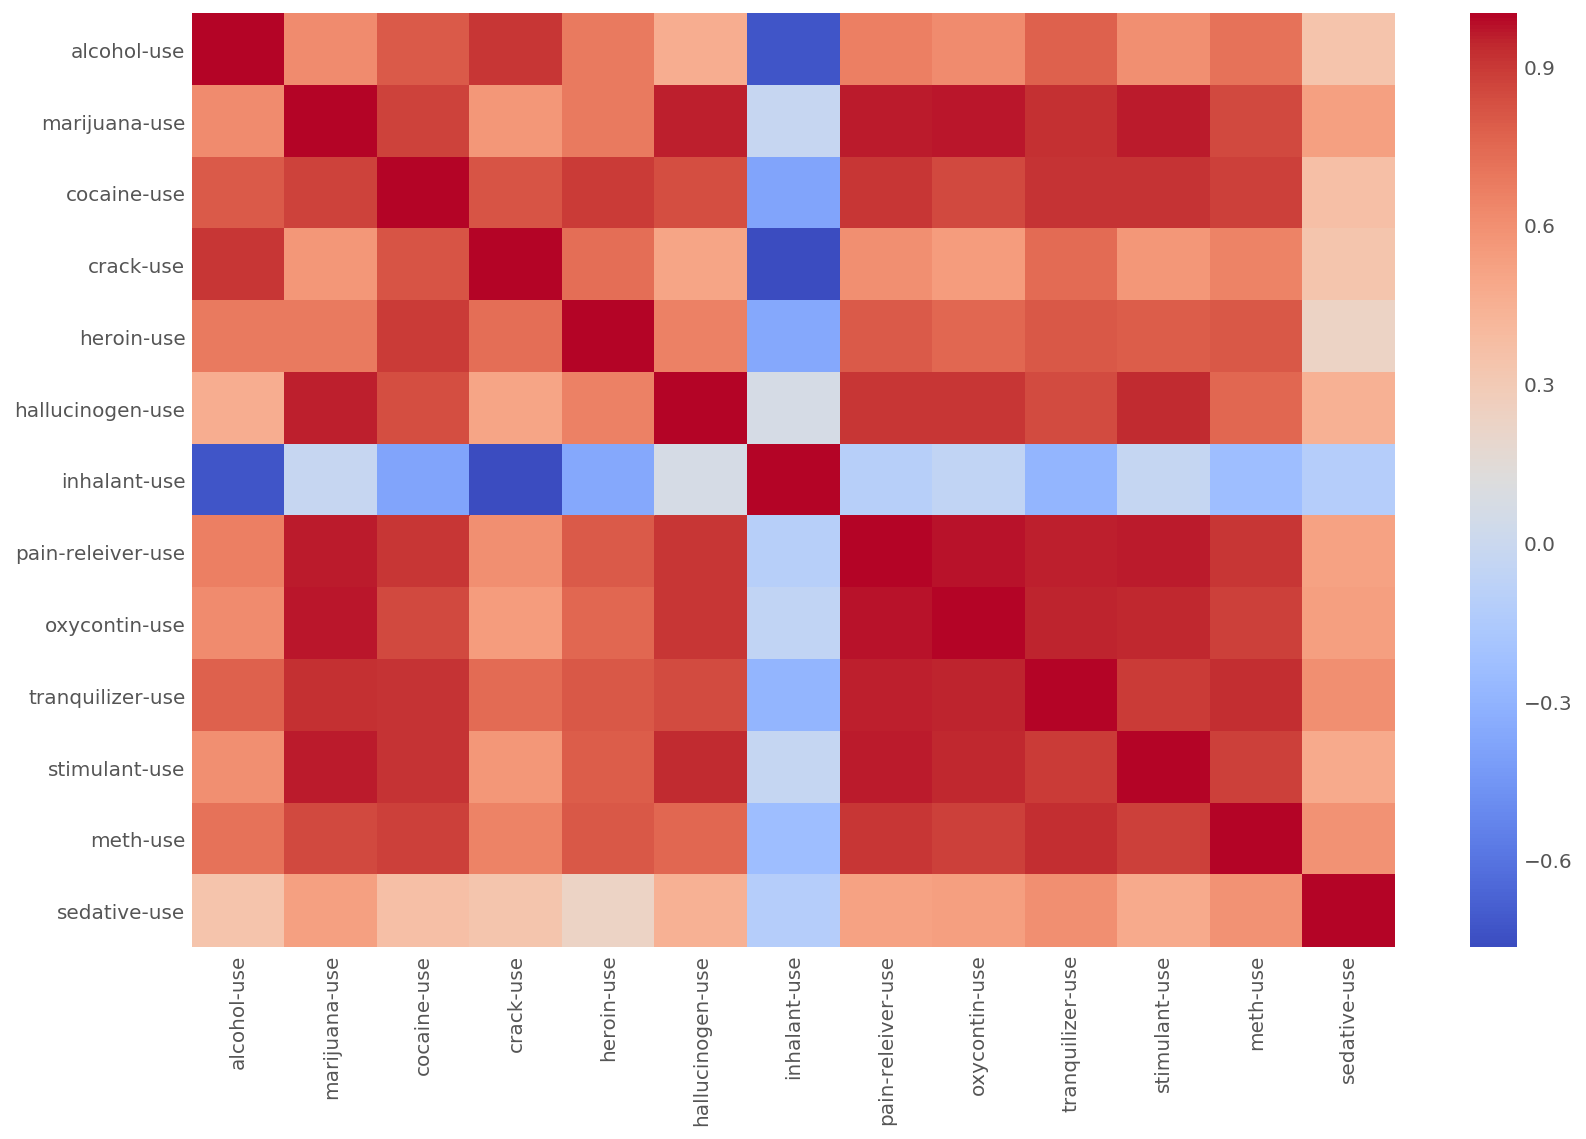

In [65]:
## Checking for any correlation between proportions between the various drugs
## i.e if high proportion in one drug will correlate to high or low proportion in another

plt.figure(figsize=(12,8))
sns.heatmap(df_2.loc[:,'alcohol-use'::2].corr(),cmap='coolwarm')

Comments:<br>
There seems to be an observable correlation/heat cluster between pain-relievers,oxycontin,tranquilizer,stimulant,meth. <br>
There appears to be a positive linear relationship between their usages. 

In [66]:
## Checking maximum proportion of each age group using illicit drugs, i.e not alcohol

df_2['illi-max-use'] = df_2.loc[:,'marijuana-use'::2].apply(max,axis=1)

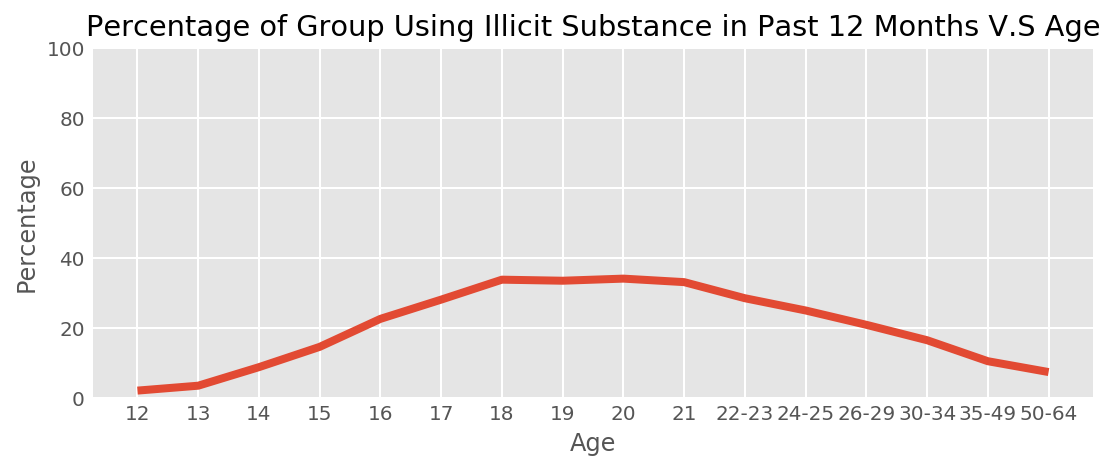

In [67]:
## Plotting illi-max-use to understand how drug user proportion changes across ages

df_2['illi-max-use'].plot.line(figsize=(8,3),title = 'Percentage of Group Using Illicit Substance in Past 12 Months V.S Age')

# Formatting the plot
plt.ylim(0,100)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(np.arange(16),np.array(df_2['age']))

plt.show()

Comments:<br>
So far we can see that many 21-22 year olds are involved in drugs that are not alcohol.

##  <font color='Green'>Running analysis on 'Drug-Frequency'</font>

In [68]:
df_2.loc[:,'alcohol-frequency'::2].describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,16.000000,16.000000,16.000000,14.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,15.000000,16.000000
mean,32.187500,43.375000,7.875000,15.035714,70.166667,8.812500,6.156250,14.125000,14.812500,12.15625,10.343750,35.966667,19.656250
std,21.451399,18.874586,8.038449,18.111263,71.394944,15.397917,4.860448,6.721855,12.798275,11.72564,6.046263,31.974581,25.621423
min,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000,4.50000,2.000000,2.000000,3.000000
25%,9.000000,28.750000,5.000000,5.000000,38.250000,3.000000,3.375000,11.500000,5.750000,6.75000,6.750000,12.000000,6.375000
50%,42.000000,52.000000,5.250000,7.750000,50.000000,3.000000,4.000000,12.000000,12.000000,10.00000,9.750000,30.000000,10.000000
75%,52.000000,54.000000,7.250000,16.500000,66.250000,4.000000,6.625000,15.000000,18.125000,11.25000,12.000000,47.000000,17.875000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.00000,24.000000,105.000000,104.000000


Comments: <br>
So far we can observe that heroin has the highest mean, followed by marijuana. That means heroin users consume the drug most frequently.

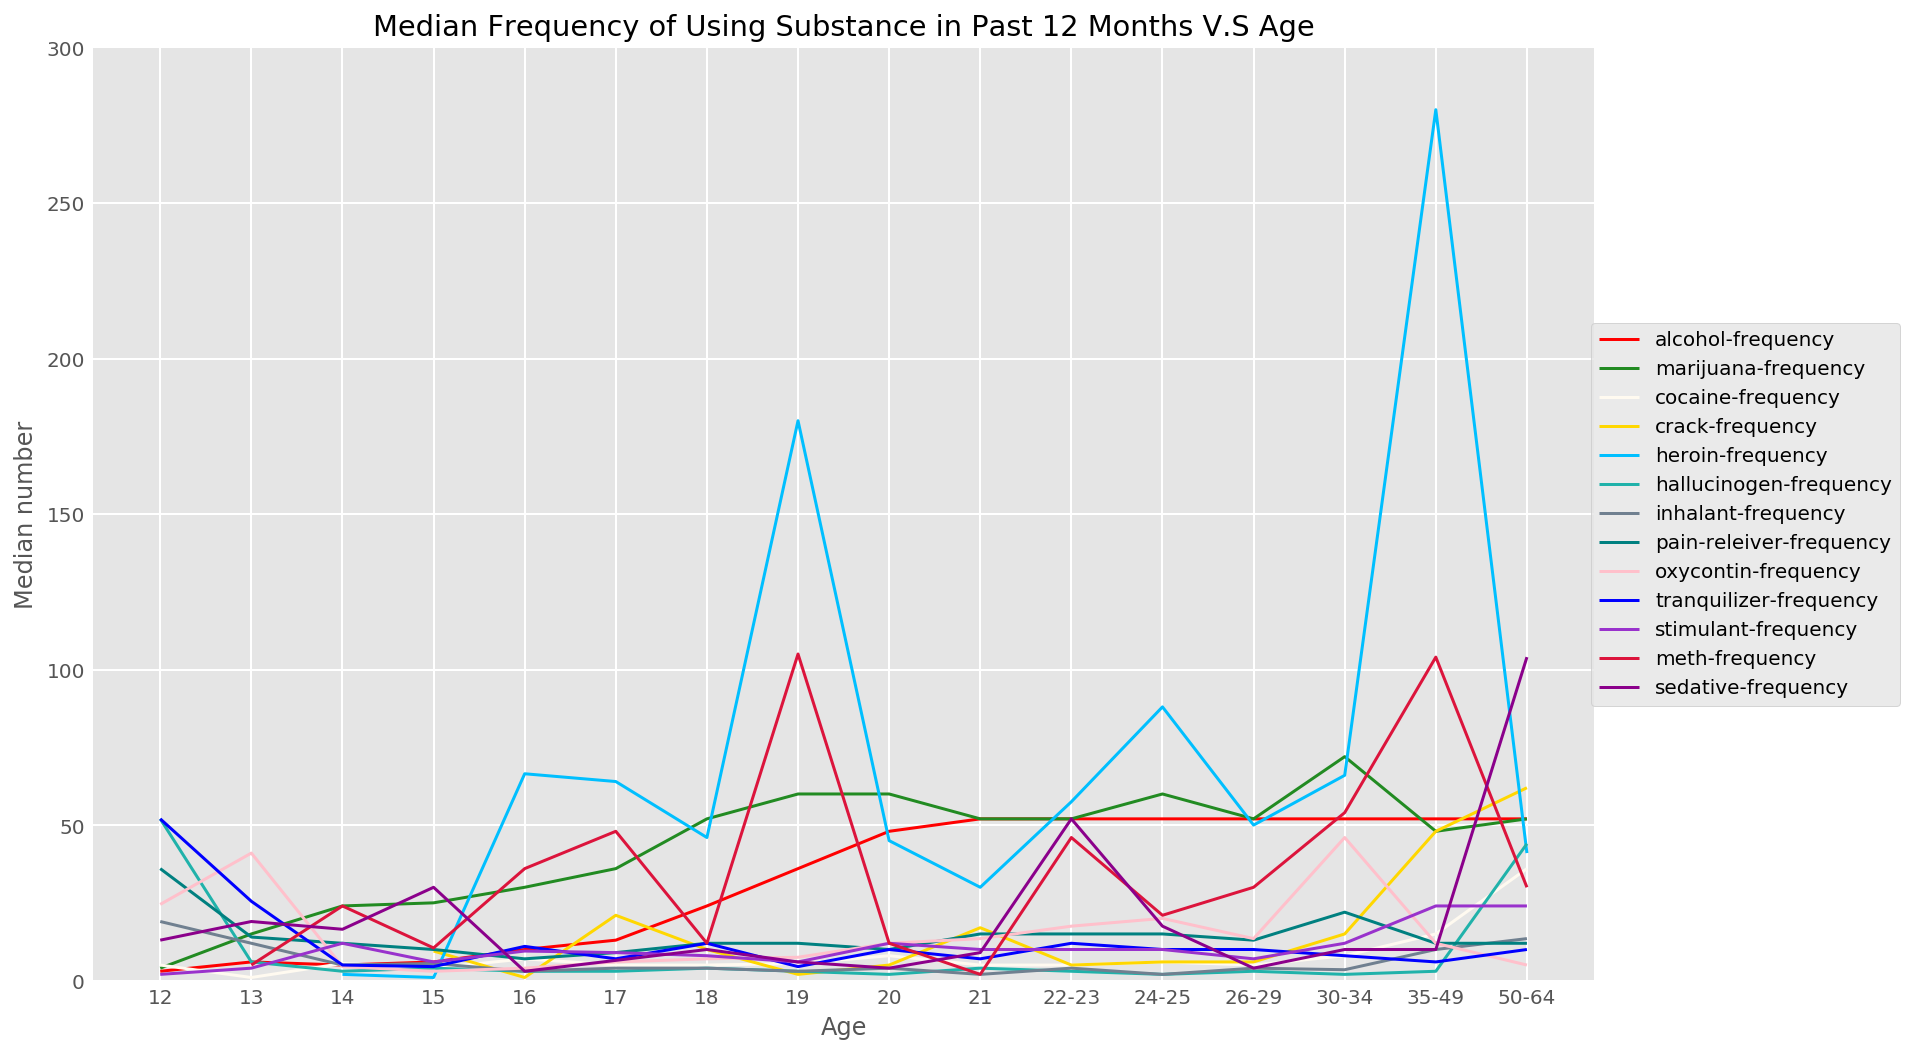

In [69]:
c =['red','forestgreen','floralwhite','gold','deepskyblue','lightseagreen','slategray','teal','pink','blue','darkorchid','crimson','darkmagenta']
df_2.loc[:,'alcohol-frequency'::2].plot.line(figsize=(12,8),title = 'Median Frequency of Using Substance in Past 12 Months V.S Age',color=c,lw=1.5)

plt.legend(loc='center',bbox_to_anchor=[1.1, 0.5])
plt.xlabel('Age')
plt.ylabel('Median number')
plt.ylim(0,300)
plt.xticks(np.arange(16),np.array(df_2['age']))
plt.show()

Comments: <br>
It can be observed that heroin is frequently used by its users, especially for 19 year olds and 35-49 year olds

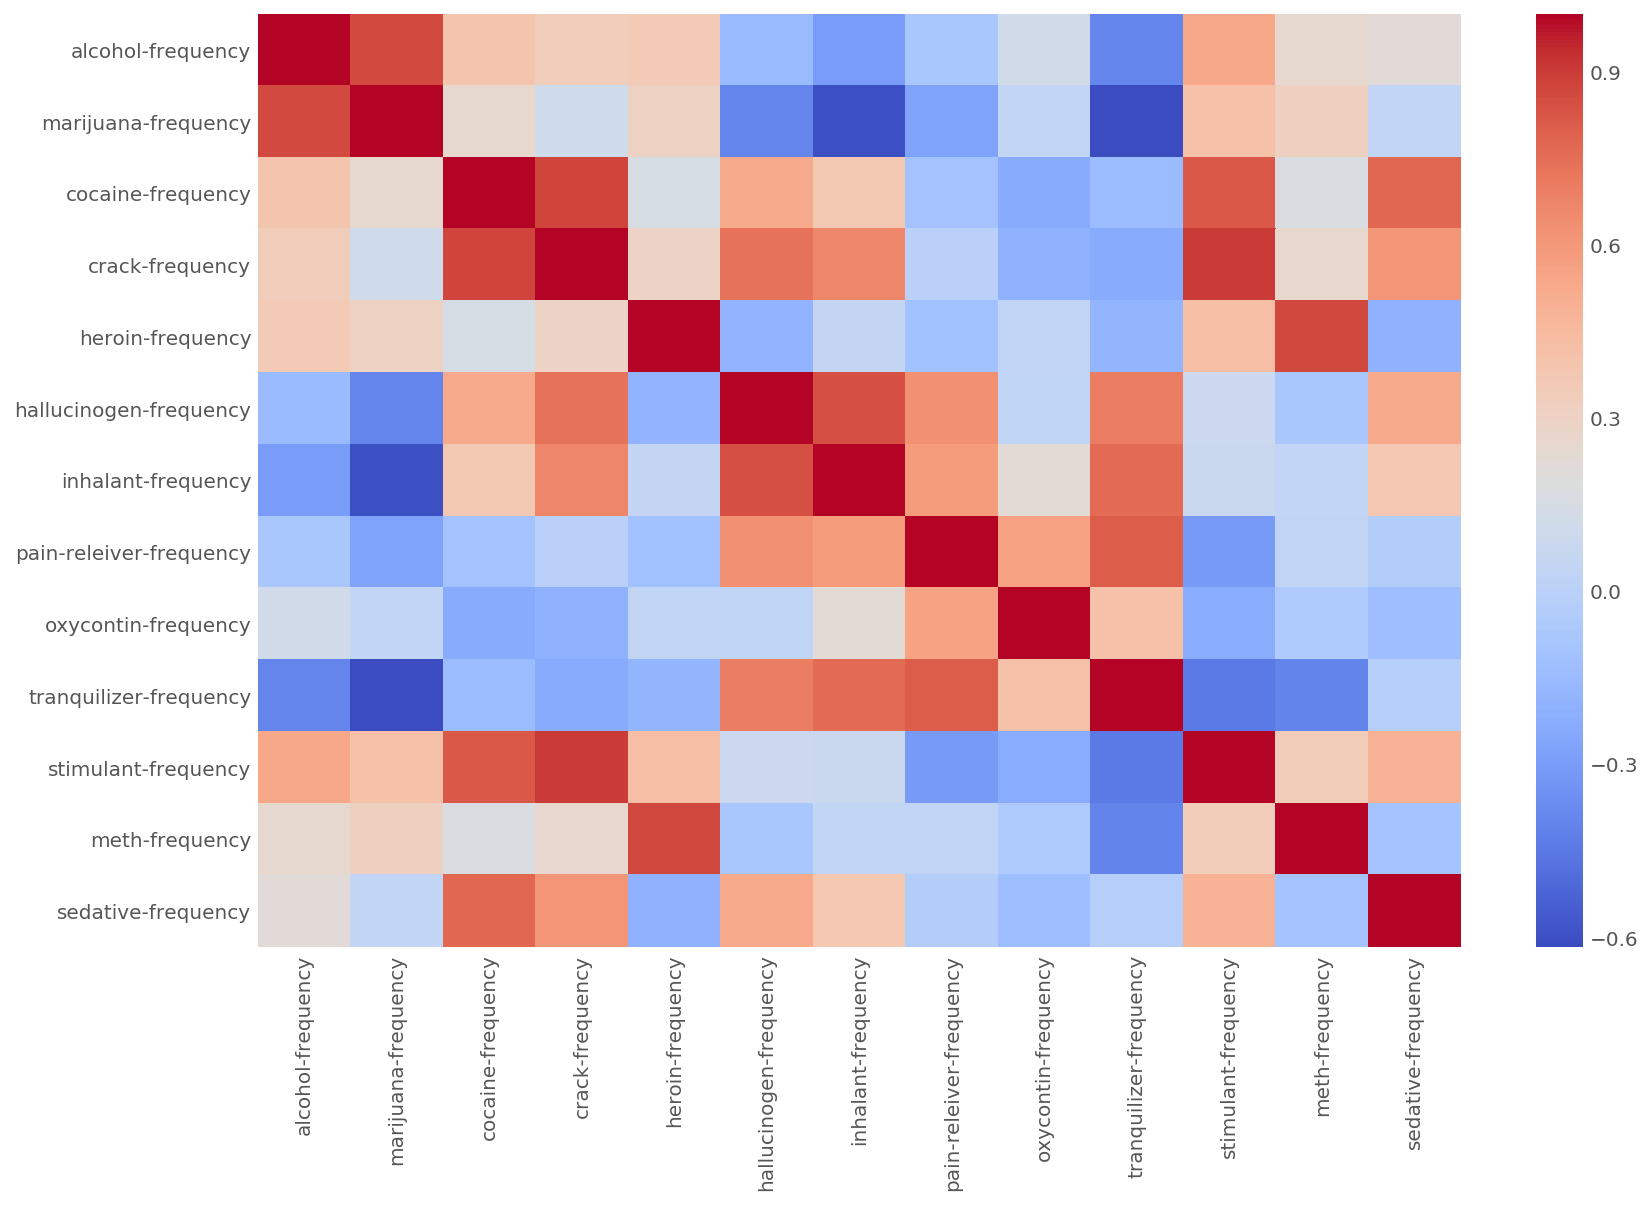

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df_2.loc[:,'alcohol-frequency'::2].corr(),cmap='coolwarm')

Comments:<br>
There appears to be a cool cluster for pain-releiver, oxycontin, tranquilizer,cocaine,crack and heroin.
Furthermore, aside from the diagonal correlation values, we can observe strong positive linear relationship between various pairs of drugs, likely to describe that they are consumed together.

### <font color='Green'><u>Answer</u></font>

1. So far, it's been observed that alcohol and marijuana are the most popular drugs, with a high proportion of each age group consuming them.<br>
2. Over 21s are the widest users among Alcohol users. 18-21 year olds are the widest users among marijuana users.<br>
3. There seems to be an observable correlation/heat cluster between pain-relievers,oxycontin,tranquilizer,stimulant,meth. <br>
 There appears to be a positive linear relationship between their usages.<br>
4. So far we can see that illicit drugs (not alcohol)usage is most widespread among 21-22 year olds.
5. We also observed that meth users are the most frequent users<br>
6. 35-49 year olds are by far the most frequent users of heroin<br>
7. There appears to be a cool cluster for pain-releiver, oxycontin, tranquilizer,cocaine,crack and heroin


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### <font color='green'>Hypothesis:</font>

There appears to be relation between alcohol and marijuana frequency.

<b>The Null Hypothesis:</b>

H0:  Alcohol and marijuana frequencies are independant.

<b>The Alternate Hypothesis:</b>

H1: Alcohol and marijuana frequencies are related.

A Chi-Square test is used to test the hypothesis, by testing the probability of independence of alchol and marijuana frequencies' data distribution among age groups.


In [71]:
## Creating new dataframe for easy calling

df_2_freq = df_2.loc[:,'alcohol-frequency'::2].copy()

In [72]:
## Running the chi2 test

observations = [list(df_2_freq['alcohol-frequency']),list(df_2_freq['marijuana-frequency'])]
chi2, p,dof,ex =stats.chi2_contingency(observations,correction=False)

In [73]:
print('Chi-Square Value = {}\nP-Value = {}\ndof = {}'.format(chi2, p, dof))

Chi-Square Value = 44.9796282874
P-Value = 7.7141508127e-05
dof = 15


### <font color = 'green'>Report:</font>
p<0.05, thus we can reject the null hypothesis (H0). We can say there is a relationship between marijuana and alcohol frequency.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

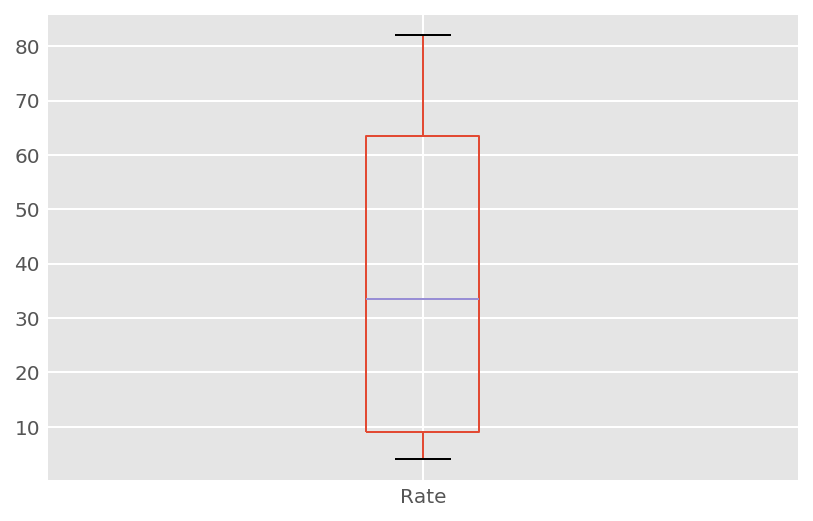

In [74]:
df[['Rate']].plot.box()

In [90]:
def outlier_check(var_str):
    print ("Find IQR for {}:".format(var_str))
    print ('--------------------')

    ## Finding 25th percentile value
    q1_score = df[[var_str]].quantile(0.25)[0]
    print ('First Quartile = {}'.format(q1_score))

    ## Finding 75th percentile value
    q3_score = df[[var_str]].quantile(0.75)[0]
    print ('Third Quartile = {}'.format(q3_score))

    ## Finding the interquartile range
    IQR_score = q3_score - q1_score
    print ('IQR = {}'.format(IQR_score))

    ## Finding lower outlier fence
    outlier_lower = q1_score - (1.5*IQR_score)
    print ('lower inner fence = {}'.format(outlier_lower))

    ## Finding upper outlier fence
    outlier_upper = q3_score + (1.5*IQR_score)
    print ('upper inner fence = {}'.format(outlier_upper))


    ## Finding any outliers
    upper_outlier = []
    lower_outlier = []
    for x in df[var_str]:
        if x > outlier_upper:
            upper_outlier.append(x)
        elif x < outlier_lower:
            lower_outlier.append(x)

    print ('Upper Outlier = {}'.format(upper_outlier))
    print ('Lower Outlier = {}'.format(lower_outlier))

In [78]:
outlier_check('Rate')

Find IQR for Rate:
--------------------
First Quartile = 9.0
Third Quartile = 63.5
IQR = 54.5
lower inner fence = -72.75
upper inner fence = 145.25
Upper Outlier = []
Lower Outlier = []


### <font color='Green'><u>Answer</u></font>

We find the outliers by setting up inner fences for a range of values to <u>not</u> be considered outliers. That means any value outside this range is an outlier. <br>
To set up the fence, we first need to find the interquatile range (IQR) which is the range between the 75th (Q3) and 25th (Q1) percentile values. We then set the lower fence with Q1-(1.5xIQR) and the upper fence with Q3+(1.5xIQR).

We found no outliers in this 'Rate' dataset as proven above.

### <font color ='Green'>Running outlier check on other variables</font>

In [79]:
outlier_check('Verbal')

Find IQR for Verbal:
--------------------
First Quartile = 501.0
Third Quartile = 562.0
IQR = 61.0
lower inner fence = 409.5
upper inner fence = 653.5
Upper Outlier = []
Lower Outlier = []


In [80]:
outlier_check('Math')

Find IQR for Math:
--------------------
First Quartile = 504.0
Third Quartile = 555.75
IQR = 51.75
lower inner fence = 426.375
upper inner fence = 633.375
Upper Outlier = []
Lower Outlier = []


No further outliers found

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [81]:
df[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### <font color='Green'>Answer:</font>
1. The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.<br>
2. To calculate the spearman rank correlation, take 6 times the sum the squared pair rank difference and divide it by the product of number of cases and squared number of cases minus 1. Then subtract this result from 1.

<img src = https://statistics.laerd.com/statistical-guides/img/spearman-2.jpg>
where di = difference in paired ranks and n = number of cases. The formula to use when there are tied ranks is:

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [82]:
df['Rate_percentile'] = [stats.percentileofscore(df['Rate'],x) for x in df['Rate']]
    

In [83]:
df[df['State']=='CA']['Rate_percentile']

23    56.730769
Name: Rate_percentile, dtype: float64

### <font color='Green'><u>Answer</u></font>
Since spearman uses the rank in its calculation, it can use percentile which also a ranking of the value in the overall distribution.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Text(0.5,1,u'Alcohol Frequency Dist Plot')

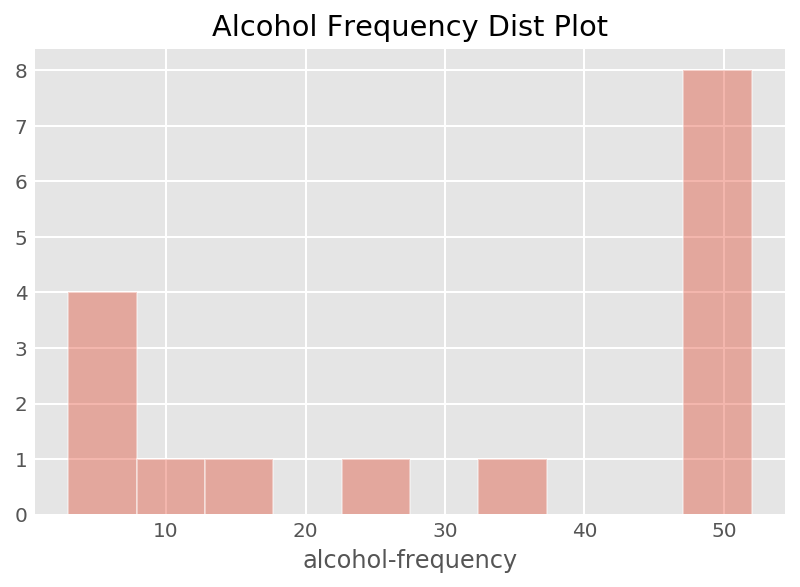

In [89]:
## Plot the distribution of a variable of your choice from the drug use dataset.

sns.distplot(df_2['alcohol-frequency'],bins=10,kde=False,hist_kws=dict(edgecolor='w',lw=1))
plt.title('Alcohol Frequency Dist Plot')

In [85]:
## Creating a column with the converted percentile score from raw score

df_2['alcohol-freq-percentile'] = [stats.percentileofscore(df_2['alcohol-frequency'],x) for x in df_2['alcohol-frequency']]

Text(0.5,1,u'Alcohol Frequency Percentile Dist Plot')

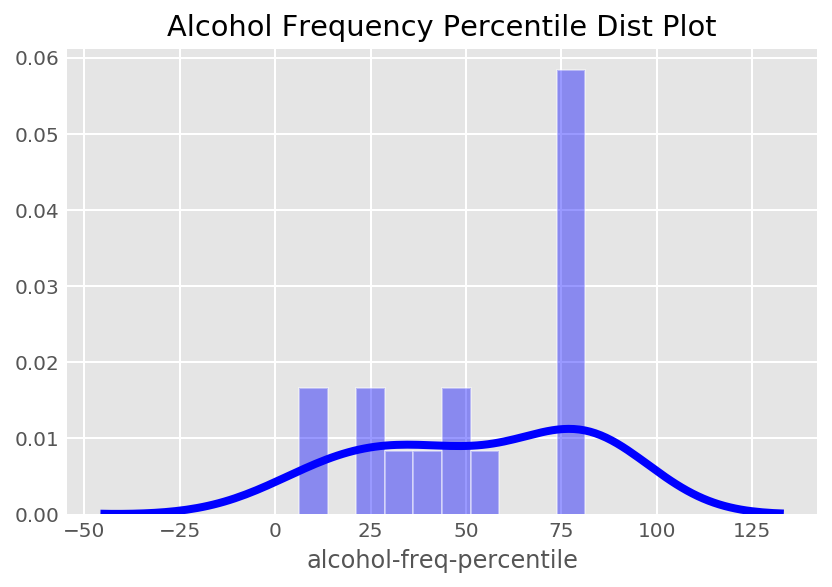

In [88]:
## Plot the same variable but percentile scored.

sns.distplot(df_2['alcohol-freq-percentile'],bins=10,kde=True,hist_kws=dict(edgecolor='w',lw=1),color='blue')
plt.title('Alcohol Frequency Percentile Dist Plot')

### <font color='green'>Answer:</font>
Converting the raw scores to percentile evens out the distribution visually. (I'm not too sure)